In [1]:
push!(LOAD_PATH, pwd())
using LightGraphs, IndirectRec, GraphConnectivityTheory,GraphCreation
using PyCall, PyPlot, Distributions
@pyimport seaborn as sns

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


# Average critical threshold

In [ ]:
N = 100
p = 0.2
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
k_ideal_range = collect(5:5:40)
p_know_range = zeros((length(k_ideal_range),length(graph_type_range)))
p_know_range_th = similar(p_know_range)
p_know_range_perc = similar(p_know_range)
k_range = similar(p_know_range)
p_known_fn = (x,y) -> get_p_known_first_order(x,y,p)
for (j,graph_type) in enumerate(graph_type_range)
    for (i,k) in enumerate(k_ideal_range)
        g = create_graph(N,k,graph_type)
        k_range[i,j] = 2*LightGraphs.ne(g)/LightGraphs.nv(g)
        p_know_range[i,j] = get_mean_p_known_on_node_for_graph(g, p_known_fn)
        p_know_range_th[i,j] = get_p_known_first_order_theory(g, p)
        p_know_range_perc[i,j] = get_p_known_percolation(g,p)[end]
    end
end

In [ ]:
using PyPlot
colors_arr = ["b","r","g"]
linestyle_arr = ["-o","-^","-s"]
for (j,graph_type) in enumerate(graph_type_range)
    plot(k_range[:,j],1./p_know_range[:,j],linestyle_arr[j],color=colors_arr[j])
    plot(k_range[:,j],1./p_know_range_th[:,j],color=colors_arr[j],linestyle="--")
    plot(k_range[:,j],1./p_know_range_perc[:,j],color=colors_arr[j],linestyle="-")
end
ylabel(L"$\left(\frac{b}{c}\right)^*$",size=20)
xlabel(L"$k$",size=20)
grid()


# Higher Order Gossip and Percolation Theory

We can give a theoretical description of the average value of $p_{known}$ for a node on an erdos-renyi random graph. Each edge exists with probility $p_{edge} = \frac{k}{N-1}$. Now, we sample each edge existing with probability $p$. Thus in the sample, each edges exists with probability $$p \frac{k}{N-1}$$. The percolation probability on this graph is
$$P_{percolate,gnp}(N,p p_{edge})$$

This percolation probability is made up of two distinct events. The event where two randomly picked nodes are connected by a direct edge, and the event where those two nodes are not connected by a direct edge, but instead by some longer path. We can thus write

$$P_{percolate,gnp}(N,p p_{edge}) = p p_{edge} + (1 - p p_{edge}) p_{longer path}$$
or
$$p_{longer path} = \frac{P_{percolate,gnp}(N,p p_{edge}) - p p_{edge}}{1 - p p_{edge}}$$

Now, we are picking only edges that already exist in the graph before, so the probability that the two nodes are connected by a direct edge is $p$ and not $p p_{edge}$. Thus, we obtain
$$P = p + (1-p) p_{longer path} = p + (1-p) \frac{P_{percolate,gnp}(N,p p_{edge}) - p p_{edge}}{1 - p p_{edge}} $$

$P_{percolate}$ is given by the 2 terminal reliability function.


## Plotting theory calculations of p_known

In [ ]:
p_range = 0.0:0.05:1.0
n_range = 0:1:20
num_trials = 1000
# p_known_th_arr = [get_p_known_nth_order_theory(g,p,n) for n in n_range, p in p_range]
# p_known_perc_arr = [get_p_known_percolation(g,p,num_trials)[end] for p in p_range]
# p_known_perc_th_arr = [get_p_known_percolation_theory(g,p) for p in p_range]
# p_known_perc_cutoff_arr = [get_p_known_percolation(g,p,n,num_trials)[end] for n in n_range, p in p_range]

# surf(p_range,n_range,p_known_th_arr,cstride=1,rstride=1)
# gca()[:view_init](elev=30,azim=-150)
# xlabel(L"p")
# ylabel(L"order")
# figure()
plot(p_range,p_known_th_arr[1,:]',label="paths theory 1","-.")
plot(p_range,p_known_th_arr[2,:]',label="paths theory 2","-.")
for n in [1,2,3,6,10,20]
    plot(p_range,p_known_perc_cutoff_arr[n,:]',label="percolation MC, order $(n-1)","--")
end

plot(p_range,p_known_perc_arr,label="percolation MC")
plot(p_range,p_known_perc_th_arr,label="reliability theory")

#plot(p_range,p_range)
legend(loc = "lower right")

In [7]:
N = 100
p = 0.05
num_trials = 50
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster"]
n_range = [1,2,3,5,7,100]
k_ideal_range = collect(2:2:48)
p_know_range_th = zeros((length(k_ideal_range),length(graph_type_range)))
p_know_range = similar(p_know_range_th)
p_know_range_th2 = similar(p_know_range_th)
p_know_range_perc_th = similar(p_know_range_th)
p_know_range_perc_order = zeros((length(k_ideal_range),length(graph_type_range),length(n_range)))
k_range = similar(p_know_range_th)
p_known_fn = (x,y) -> get_p_known_first_order(x,y,p)
for (j,graph_type) in enumerate(graph_type_range)
    for (i,k) in enumerate(k_ideal_range)
        g = create_graph(N,k,graph_type)
        k_range[i,j] = 2*LightGraphs.ne(g)/LightGraphs.nv(g)
#         p_know_range[i,j] = get_mean_p_known_on_node_for_graph(g, p_known_fn)
#         p_know_range_th[i,j] = get_p_known_first_order_theory(g, p)
#         p_know_range_th2[i,j] = get_p_known_second_order_theory(g, p)
        p_know_range_perc_th[i,j] = get_p_known_percolation_theory(g,p)
        for (l,n) in enumerate(n_range)
            p_know_range_perc_order[i,j,l] = get_p_known_percolation(g,p,n,num_trials)[end]
        end
    end
end

In [3]:
data_dir_path = "../data/per_graph_data/"
filenames = split(readall(`ls $data_dir_path`));
filenames[:]

4-element Array{SubString{ASCIIString},1}:
 "N_100_2016-03-26T01:41:44.jld"
 "N_100_2016-03-28T01:36:19.jld"
 "N_100_2016-03-29T17:26:04.jld"
 "N_400_2016-03-29T01:53:31.jld"

In [4]:
using JLD
d = JLD.load(data_dir_path * filenames[3])
p_know_range_perc_th = d["p_know_range_perc_th"]
p_know_range_perc_order = d["p_know_range_perc_order"]
N = d["N"]
graph_name_range = d["graph_name_range"]
graph_type_range = d["graph_type_range"]
n_range = d["n_range"]
k_range = d["k_range"]
clustering_range = d["clustering_range"]
p = d["p"]

0.2

In [9]:
clustering_range,k_range

(
24x4 Array{Float64,2}:
 0.0166143  0.0        0.0       0.281358
 0.0549009  0.0802381  0.740787  0.407992
 0.0507586  0.127133   0.604143  0.44602 
 0.078107   0.121149   0.539135  0.505859
 0.105583   0.169086   0.497034  0.535379
 0.123554   0.184178   0.504679  0.534293
 0.14636    0.195321   0.544486  0.556097
 0.170778   0.214202   0.564542  0.571802
 0.189412   0.230722   0.582842  0.589713
 0.207672   0.240488   0.598868  0.638185
 0.220922   0.251288   0.612987  0.627876
 0.244364   0.272033   0.600232  0.652722
 0.264988   0.290127   0.608607  0.656895
 0.287957   0.307502   0.586434  0.669345
 0.306618   0.313176   0.584675  0.668056
 0.322528   0.344983   0.58617   0.661983
 0.344962   0.351533   0.597472  0.660949
 0.367812   0.377073   0.565263  0.723852
 0.386097   0.393657   0.571023  0.707298
 0.40485    0.414593   0.586556  0.715089
 0.425346   0.438344   0.578153  0.692853
 0.449169   0.449218   0.762589  0.71753 
 0.464305   0.471712   0.780984  0.726289
 0.491149


Use "Dict{Any,Any}(a=>b, ...)" instead.


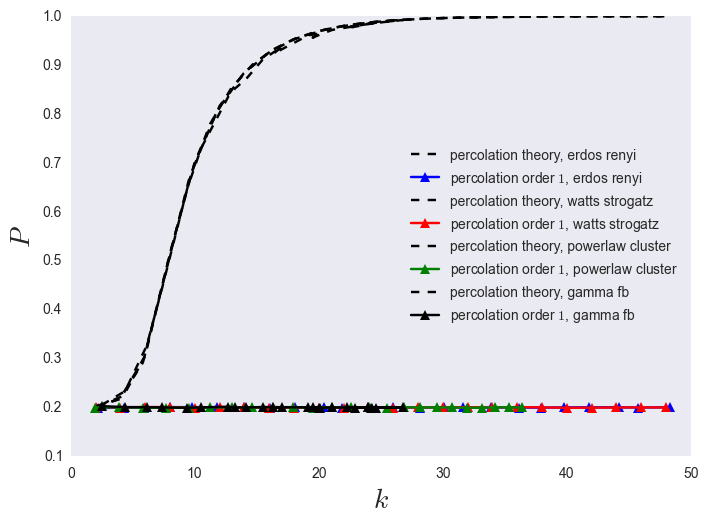

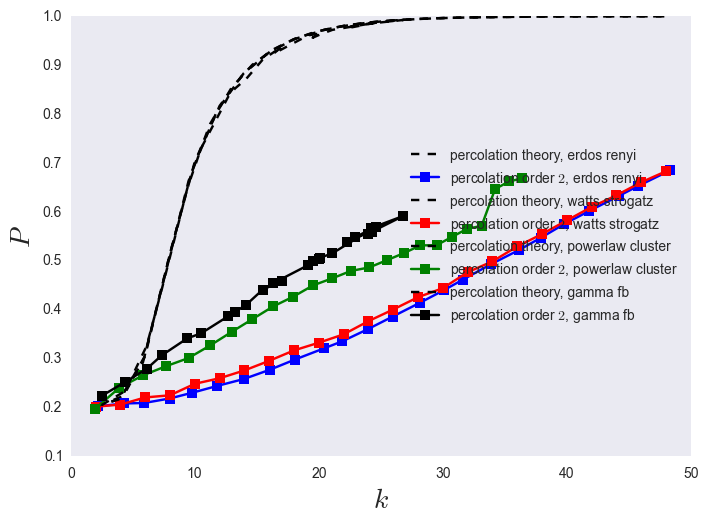

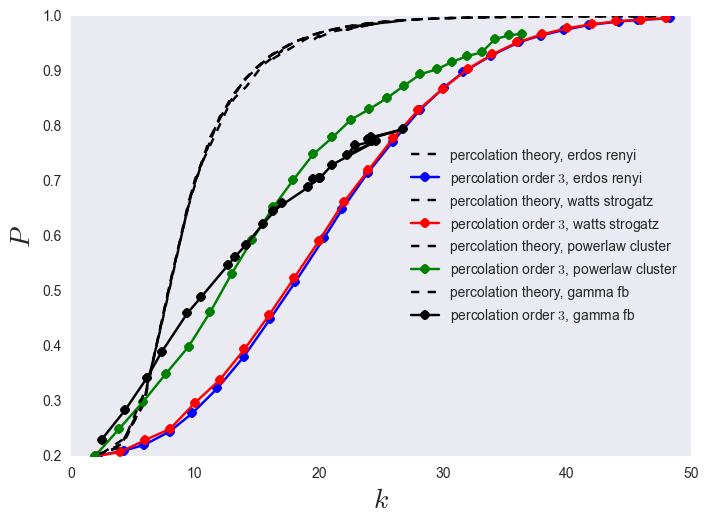

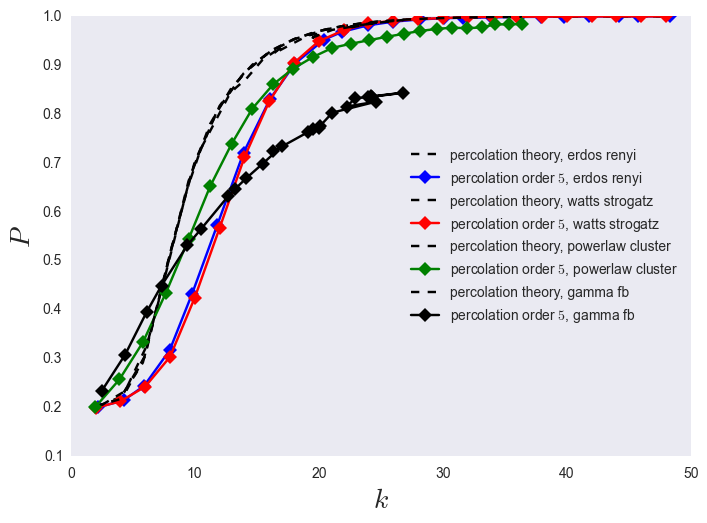

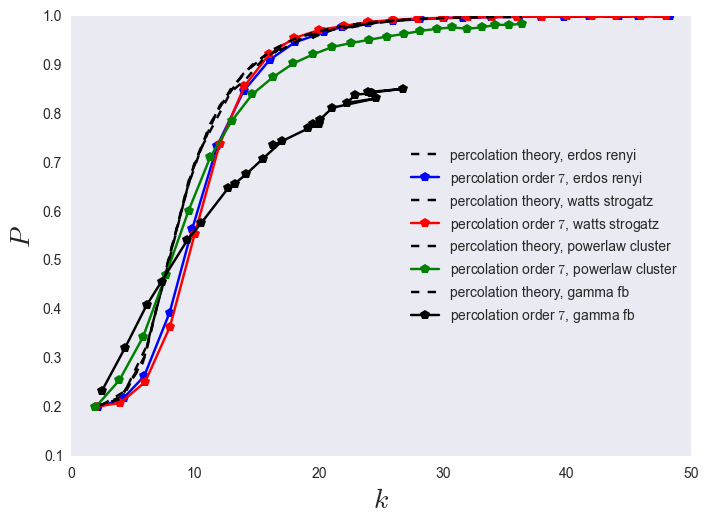

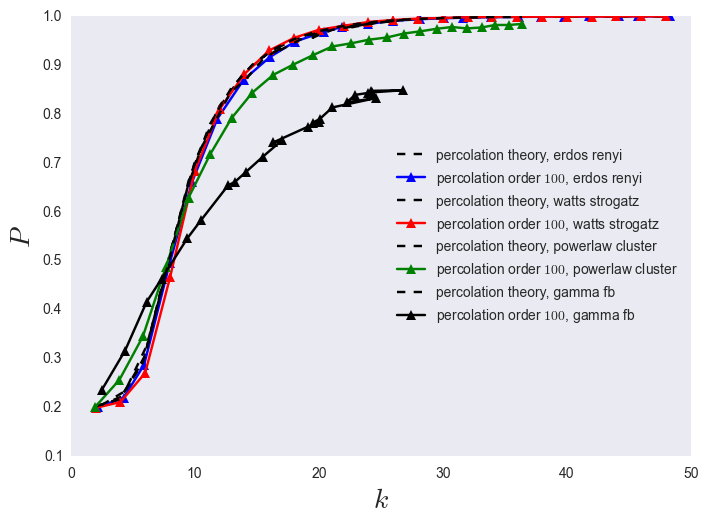

In [10]:
colors_arr = ["b","r","g","k"]
linestyle_arr = ["-p","-^","-s","-o","-D"]
for (l,n) in enumerate(n_range[1:end])
    figure(l)
    for (j,graph_type) in enumerate(graph_type_range)
        plot(k_range[:,j],p_know_range_perc_th[:,j],"--",color="k",label="percolation theory, $(graph_name_range[j])")
    #plot(k_range[:,j],1./p_know_range[:,j],linestyle_arr[j],color=colors_arr[j],linestyle=linestyle_arr[j])
    #plot(k_range[:,j],1./p_know_range_th[:,j],linestyle_arr[j],color=colors_arr[j])
        if true#j == 1 || l == 1
            label = latexstring("percolation order \$$n\$, $(graph_name_range[j])")
        else
            label = ""
        end
        plot(k_range[:,j],p_know_range_perc_order[:,j,l],linestyle_arr[1 + (l % length(linestyle_arr))],color=colors_arr[j],label=label)
    end
    ylabel(L"$P$",size=20)
    xlabel(L"$k$",size=20)
    grid()
    legend(prop={"size"=>10},loc="center right")
    #savefig("../figures/b_c_critical_vs_k_p0.2_N100_percolation_orders_$(graph_name_range[j]).png")
end




Use "Dict{Any,Any}(a=>b, ...)" instead.


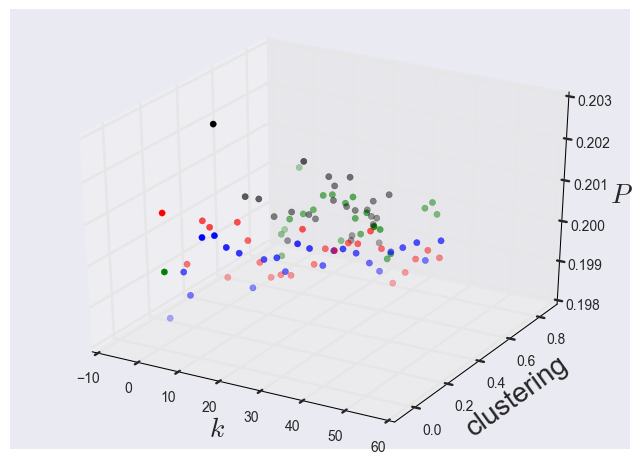

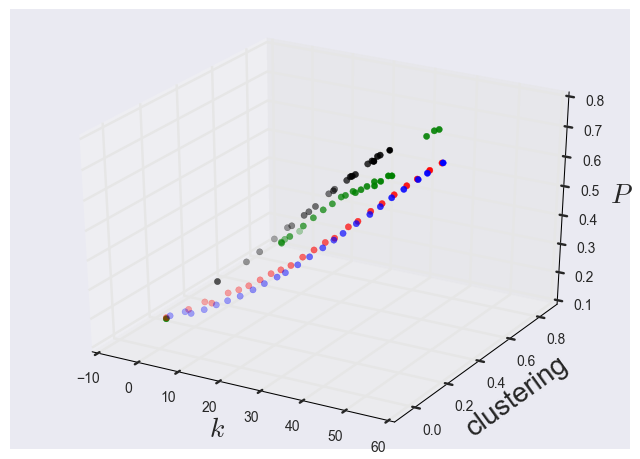

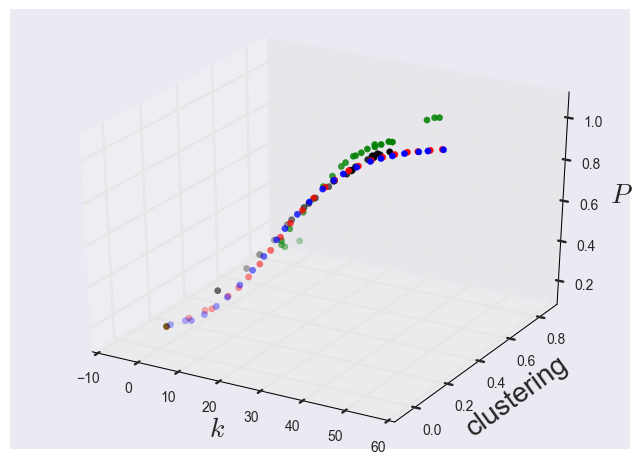

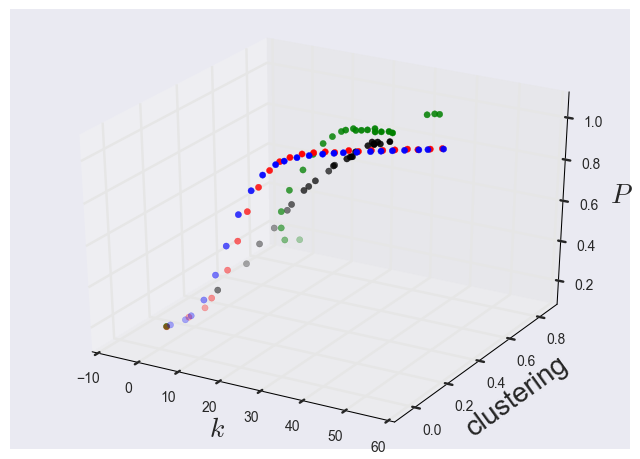

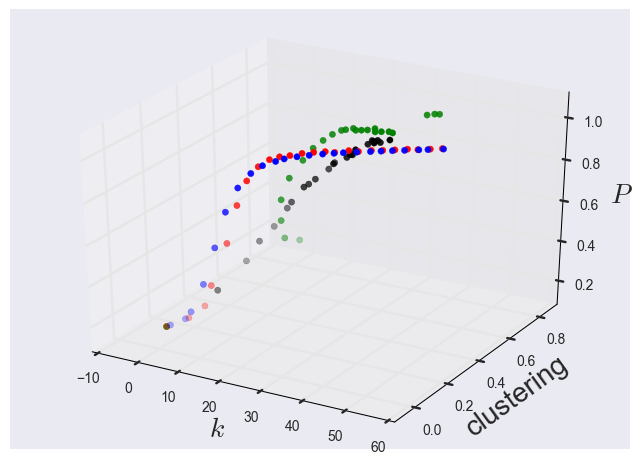

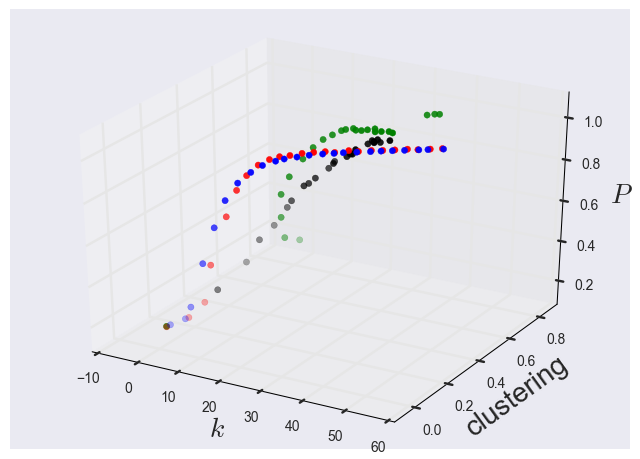

In [8]:
colors_arr = ["b","r","g","k"]
linestyle_arr = ["-p","-^","-s","-o","-D"]
for (l,n) in enumerate(n_range[1:end])
    figure(l)
    for (j,graph_type) in enumerate(graph_type_range)
        #plot(k_range[:,j],p_know_range_perc_th[:,j],"--",color="k",label="percolation theory, $(graph_name_range[j])")
    #plot(k_range[:,j],1./p_know_range[:,j],linestyle_arr[j],color=colors_arr[j],linestyle=linestyle_arr[j])
    #plot(k_range[:,j],1./p_know_range_th[:,j],linestyle_arr[j],color=colors_arr[j])
        if true#j == 1 || l == 1
            label = latexstring("percolation order \$$n\$, $(graph_name_range[j])")
        else
            label = ""
        end
        scatter3D(k_range[:,j],clustering_range[:,j],p_know_range_perc_order[:,j,l],color=colors_arr[j])#,linestyle_arr[1 + (l % length(linestyle_arr))],color=colors_arr[j],label=label)
    end
    ylabel("clustering",size=20)
    xlabel(L"$k$",size=20)
    zlabel(L"$P$",size=20)
    grid()
    legend(prop={"size"=>10},loc="center right")
    #savefig("../figures/b_c_critical_vs_k_p0.2_N100_percolation_orders_$(graph_name_range[j]).png")
end


In [46]:
# Pkg.add("Plots")
using Plots
x = randn(10)
# j = 2
l = 2

# for (l,n) in enumerate(n_range[1:end])
for (j,graph_type) in enumerate([2])# enumerate(graph_type_range)
    scatter3d(k_range[:,j],clustering_range[:,j],p_know_range_perc_order[:,j,l])
end
l = 2
j = 1
scatter3d(k_range[:,j],clustering_range[:,j],p_know_range_perc_order[:,j,l])
j = 2
hold(1)
scatter3d(k_range[:,j],clustering_range[:,j],p_know_range_perc_order[:,j,l])
j = 3
hold(1)
scatter3d(k_range[:,j],clustering_range[:,j],p_know_range_perc_order[:,j,l])

# end

<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Created with matplotlib (http://matplotlib.org/) -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 0 -->
 
 <path d="M 4.15625 35.296875 
Q 4.15625 48 6.765625 55.734375 
Q 9.375 63.484375 14.515625 67.671875 
Q 19.671875 71.875 27.484375 71.875 
Q 33.25 71.875 37.59375 69.546875 
Q 41.9375 67.234375 44.765625 62.859375 
Q 47.609375 58.5 49.21875 52.21875 
Q 50.828125 45.953125 50.828125 35.296875 
Q 50.828125 22.703125 48.234375 14.96875 
Q 45.65625 7.234375 40.5 3 
Q 35.359375 -1.21875 27.484375 -1.21875 
Q 17.140625 -1.21875 11.234375 6.203125 
Q 4.15625 15.140625 4.15625 35.296875 
M 13.1875 35.296875 
Q 13.1875 17.671875 17.3125 11.828125 
Q 21.4375 6 27.484375 6 
Q 33.546875 6 37.671875 11.859375 
Q 41.796875 17.71875 41.796875 35.296875 
Q 41.796875 52.984375 37.671875 58.78125 
Q 33.546875 64.59375 27.390625 64.59375 
Q 21.34375 64.59375 17.71875 59.46875 
Q 13.1875 52.9375 13.1875 35.296875 
" id="ArialMT-30"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 5 -->
 
 <path d="M 4.15625 18.75 
L 13.375 19.53125 
Q 14.40625 12.796875 18.140625 9.390625 
Q 21.875 6 27.15625 6 
Q 33.5 6 37.890625 10.78125 
Q 42.28125 15.578125 42.28125 23.484375 
Q 42.28125 31 38.0625 35.34375 
Q 33.84375 39.703125 27 39.703125 
Q 22.75 39.703125 19.328125 37.765625 
Q 15.921875 35.84375 13.96875 32.765625 
L 5.71875 33.84375 
L 12.640625 70.609375 
L 48.25 70.609375 
L 48.25 62.203125 
L 19.671875 62.203125 
L 15.828125 42.96875 
Q 22.265625 47.46875 29.34375 47.46875 
Q 38.71875 47.46875 45.15625 40.96875 
Q 51.609375 34.46875 51.609375 24.265625 
Q 51.609375 14.546875 45.953125 7.46875 
Q 39.0625 -1.21875 27.15625 -1.21875 
Q 17.390625 -1.21875 11.203125 4.25 
Q 5.03125 9.71875 4.15625 18.75 
" id="ArialMT-35"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 10 -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 15 -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 20 -->
 
 <path d="M 50.34375 8.453125 
L 50.34375 0 
L 3.03125 0 
Q 2.9375 3.171875 4.046875 6.109375 
Q 5.859375 10.9375 9.828125 15.625 
Q 13.8125 20.3125 21.34375 26.46875 
Q 33.015625 36.03125 37.109375 41.625 
Q 41.21875 47.21875 41.21875 52.203125 
Q 41.21875 57.421875 37.46875 61 
Q 33.734375 64.59375 27.734375 64.59375 
Q 21.390625 64.59375 17.578125 60.78125 
Q 13.765625 56.984375 13.71875 50.25 
L 4.6875 51.171875 
Q 5.609375 61.28125 11.65625 66.578125 
Q 17.71875 71.875 27.9375 71.875 
Q 38.234375 71.875 44.234375 66.15625 
Q 50.25 60.453125 50.25 52 
Q 50.25 47.703125 48.484375 43.546875 
Q 46.734375 39.40625 42.65625 34.8125 
Q 38.578125 30.21875 29.109375 22.21875 
Q 21.1875 15.578125 18.9375 13.203125 
Q 16.703125 10.84375 15.234375 8.453125 
z
" id="ArialMT-32"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 25 -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <!-- 30 -->
 
 <path d="M 4.203125 18.890625 
L 12.984375 20.0625 
Q 14.5 12.59375 18.140625 9.296875 
Q 21.78125 6 27 6 
Q 33.203125 6 37.46875 10.296875 
Q 41.75 14.59375 41.75 20.953125 
Q 41.75 27 37.796875 30.921875 
Q 33.84375 34.859375 27.734375 34.859375 
Q 25.25 34.859375 21.53125 33.890625 
L 22.515625 41.609375 
Q 23.390625 41.5 23.921875 41.5 
Q 29.546875 41.5 34.03125 44.421875 
Q 38.53125 47.359375 38.53125 53.46875 
Q 38.53125 58.296875 35.25 61.46875 
Q 31.984375 64.65625 26.8125 64.65625 
Q 21.6875 64.65625 18.265625 61.421875 
Q 14.84375 58.203125 13.875 51.765625 
L 5.078125 53.328125 
Q 6.6875 62.15625 12.390625 67.015625 
Q 18.109375 71.875 26.609375 71.875 
Q 32.46875 71.875 37.390625 69.359375 
Q 42.328125 66.84375 44.9375 62.5 
Q 47.5625 58.15625 47.5625 53.265625 
Q 47.5625 48.640625 45.0625 44.828125 
Q 42.578125 41.015625 37.703125 38.765625 
Q 44.046875 37.3125 47.5625 32.6875 
Q 51.078125 28.078125 51.078125 21.140625 
Q 51.078125 11.765625 44.234375 5.25 
Q 37.40625 -1.265625 26.953125 -1.265625 
Q 17.53125 -1.265625 11.296875 4.34

2016-03-29 18:14:34.576 julia[1335:31457] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-03-29 18:14:34.577 julia[1335:31457] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-03-29 18:14:34.579 julia[1335:31457] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-03-29 18:14:34.580 julia[1335:31457] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


## Monte Carlo calculation of p_known

In [ ]:
N = 50
p_edge = 0.2
p = 0.1
num_trials = 10
println(get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials))
println(get_p_known_percolation_theory(N,p_edge,p))

In [ ]:
N = 50
p_edge = 0.9
p = 0.90

num_trials = 10


p_edge_range = collect(0:0.1:1)
p_range = collect(0:0.1:1)

p_known_perc_exp_arr = zeros((length(p_edge_range),length(p_range)))
p_known_perc_th_arr = similar(p_known_perc_exp_arr)

for (i,p) in enumerate(p_range)
    for (j,p_edge) in enumerate(p_edge_range)
        p_known_perc_exp_arr[j,i] = get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials)
        p_known_perc_th_arr[j,i] = get_p_known_percolation_theory(N,p_edge,p)
    end
end
        
#println(get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials))

#println(get_p_known_percolation_theory(N,p_edge,p))
#@time println(get_mean_p_known_on_node_for_graph(gg,(x,y) -> get_p_known_percolation(x,y,p,num_trials)))


In [ ]:
figure()
surf(p_edge_range,p_range,(p_known_perc_exp_arr-p_known_perc_th_arr)./p_known_perc_exp_arr,cstride=1,rstride=1,alpha=0.4,color="r")
surf(p_edge_range,p_range,p_known_perc_th_arr,cstride=1,rstride=1,alpha=0.4)
gca()[:view_init](elev=30,azim=210)
xlabel(L"$p_{edge}$")
ylabel(L"$p$")


In [ ]:
function get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials)
    graph_trials = 100
    p_known = 0
    for i = 1:graph_trials
        g = LightGraphs.erdos_renyi(N,p_edge)
        p_known += get_p_known_percolation(g,p,num_trials)[end]
    end
    return p_known / graph_trials
end

# Plotting of distribution over nodes

In [ ]:
unshift!(PyVector(pyimport("sys")["path"]), "")
@pyimport graph_reciprocity as gr
@pyimport networkx as nx

In [ ]:
gr.plot_histograms(all_thresholds,p)
plot_colored_graphs(graph_fns,all_graphs,all_thresholds,all_degrees,graph_names,p)

In [3]:
using JLD

##facebook: N = 4040, k = 44
N = 1000
p = 0.4
num_trials = 100
num_trials_perc = 200
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster,:fb]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster", "facebook"]
n_range = [2,7] 
k = 7

#histogram data
hist_all_degrees = Array(Array{Any,1},(length(n_range),length(graph_type_range)))
hist_all_thresholds = Array(Array{Any,1},(length(n_range),length(graph_type_range)))
hist_all_clustering= Array(Array{Any,1},(length(n_range),length(graph_type_range)))
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        num_trials_curr = graph_type == :fb ? 1 : num_trials
        hist_all_thresholds[i,j] = Any[]
        hist_all_degrees[i,j] = Any[]
        hist_all_clustering[i,j] = Any[]
        for l = 1:num_trials_curr
            g = create_graph(N,k,graph_type)
            p_knowns = get_p_known_percolation(g,p,n,num_trials_perc)[1]
    #         p_knowns = p_knowns[p_knowns .> 0.0]
            hist_all_degrees[i,j] = vcat(hist_all_degrees[i,j],LightGraphs.degree(g))
            hist_all_thresholds[i,j] = vcat(hist_all_thresholds[i,j],p_knowns)
            hist_all_clustering[i,j] = vcat(hist_all_clustering[i,j],LightGraphs.local_clustering_coefficient(g))
        end

    end
end

save("../data/per_node_data/N_$(N)_$(now).jld","hist_all_degrees",hist_all_degrees,
"hist_all_thresholds",hist_all_thresholds,"hist_all_clustering",hist_all_clustering)


LoadError: LoadError: InterruptException:
while loading In[3], in expression starting on line 17

## READ DATA

In [24]:
data_dir_path = "../data/per_node_data/"
filenames = split(readall(`ls $data_dir_path`));
filenames[:]

2-element Array{SubString{ASCIIString},1}:
 "N_4040_2016-03-25T13:33:37.jld"
 "N_4040_now.jld"                

In [25]:
using JLD
d = JLD.load(data_dir_path * filenames[1])
hist_all_clustering = d["hist_all_clustering"]
hist_all_degrees = d["hist_all_degrees"]
hist_all_thresholds = d["hist_all_thresholds"]
N = d["N"]
k = d["k"]
graph_name_range = d["graph_name_range"]
graph_type_range = d["graph_type_range"]
n_range = d["n_range"]
p = d["p"]

0.2

In [26]:
n_range

5-element Array{Int64,1}:
 2
 3
 4
 5
 7

In [27]:
mean_degrees = zeros(size(hist_all_degrees)) 
mean_thresholds = zeros(size(hist_all_degrees)) 
mean_clustering = zeros(size(hist_all_degrees)) 
for j = 1:5
    for i = 1:4
        mean_degrees[j,i] =  mean(hist_all_degrees[j,i])
        mean_thresholds[j,i] =  mean(hist_all_thresholds[j,i])
        mean_clustering[j,i] =  mean(hist_all_clustering[j,i])
    end
end

# println([mean(hist_all_degrees[j,i]) for i in 1:4])
# println([mean(hist_all_clustering[j,i]) for i in 1:4])
# println([mean(hist_all_thresholds[j,i]) for i in 1:4])

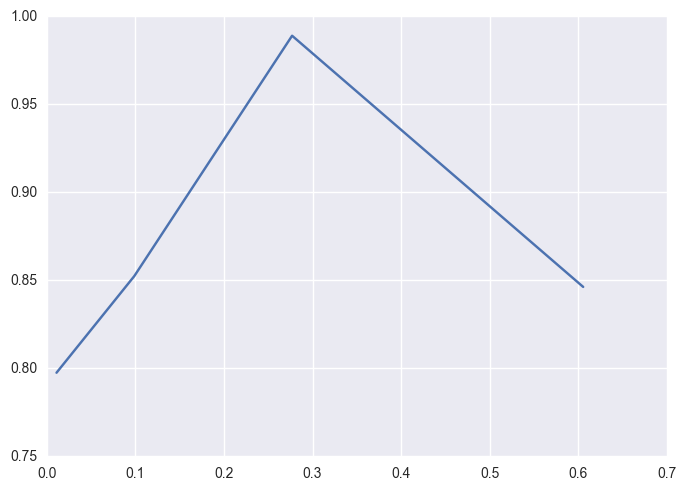

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32d22de50>

In [30]:
j = 3
plot(mean_clustering[j,:]',mean_thresholds[j,:]')

In [ ]:
N = 100
p = 0.4
num_trials = 10
num_trials_perc = 100
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster"]
n = 2 #[1,5] 
k = 5
all_graphs = Array(Any,length(graph_type_range))
all_degrees = Array(Any,length(graph_type_range))
all_thresholds = Array(Array{Any,1},length(graph_type_range))
for (j,graph_type) in enumerate(graph_type_range)
    g = create_graph(N,k,graph_type)
    p_knowns = get_p_known_percolation(g,p,n,num_trials_perc)[1]

    all_graphs[j] = make_networkx_graph_from_lightgraph(g)
    all_degrees[j] = LightGraphs.degree(g)
    all_thresholds[j] = p_knowns
    #     p_knowns = p_knowns[p_knowns .> 0.0]
end

In [ ]:
gr.plot_histograms(hist_all_thresholds,p)#,N)

In [ ]:
gr.plot_colored_graphs(all_graphs,all_thresholds,all_degrees,graph_name_range,p)

In [ ]:
fig = figure()
scatter(hist_all_degrees[3],hist_all_thresholds[3])
fig[:canvas][:draw]()
show()

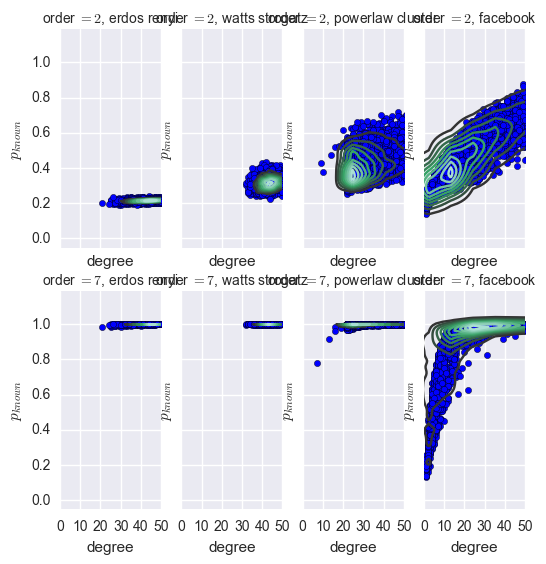

In [22]:
#PyPlot.figure()
#PyPlot.plot([1,2,3],[1,2,3])
#PyPlot.show()
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]),ax=ax)

        ax[:set_xlabel]("degree")
        ax[:set_ylabel](L"$p_{known}$")
        ax[:set](xlim=(0, 50))
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)

    end
end
#savefig()
#show()

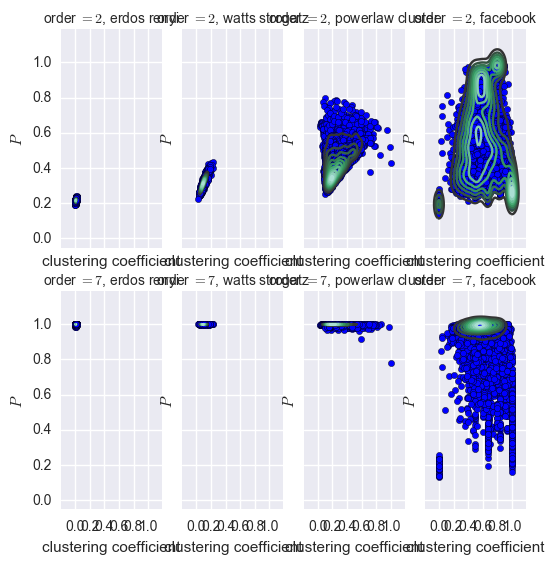

In [32]:
#PyPlot.figure()
#PyPlot.plot([1,2,3],[1,2,3])
#PyPlot.show()
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_clustering[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_clustering[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]),ax=ax)

        ax[:set_xlabel]("clustering coefficient")
        ax[:set_ylabel](L"$P$")
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)
    end
end

#show()

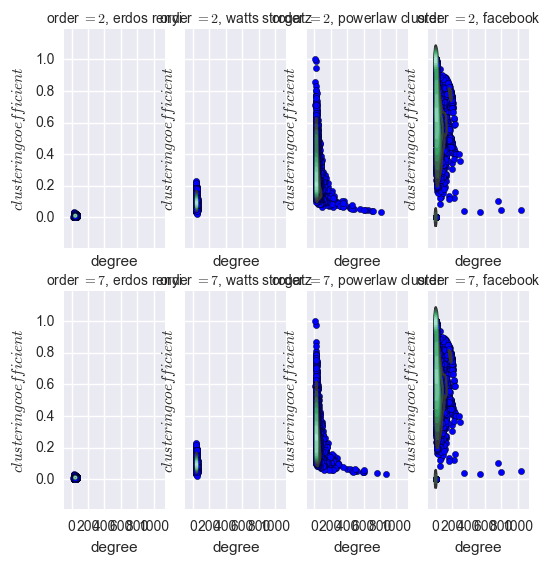

In [34]:
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_clustering[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_clustering[i,j]),ax=ax)

        ax[:set_xlabel]("degree")
        ax[:set_ylabel](L"$clustering coefficient$")
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)
    end
end


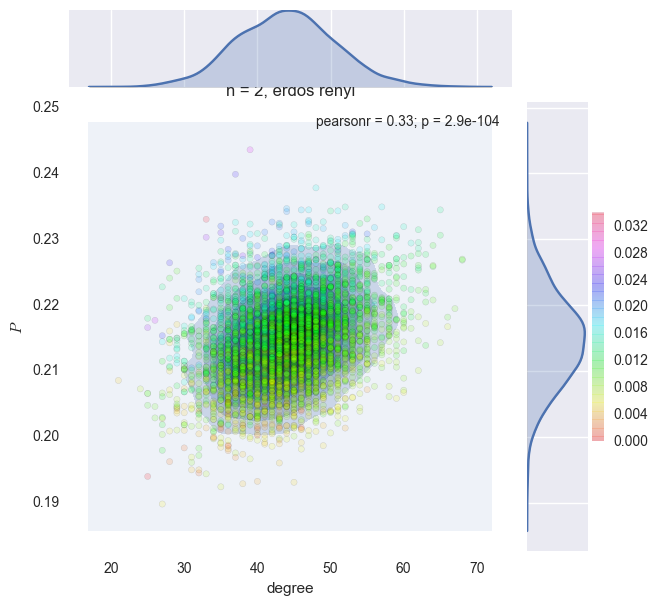

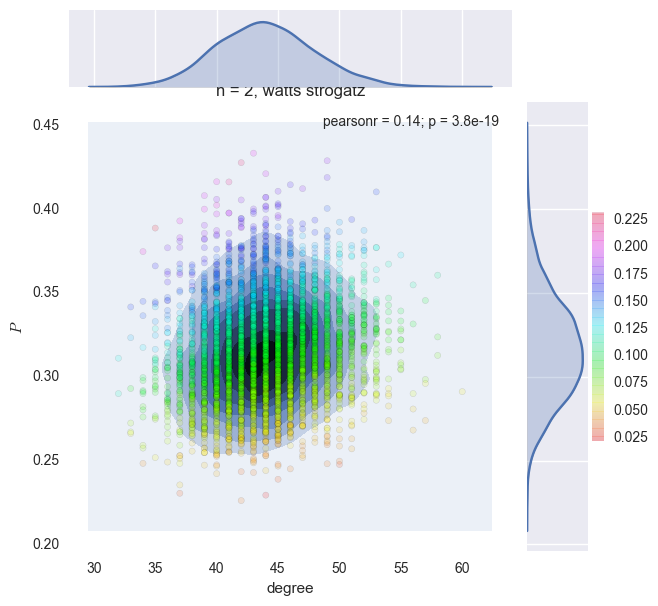

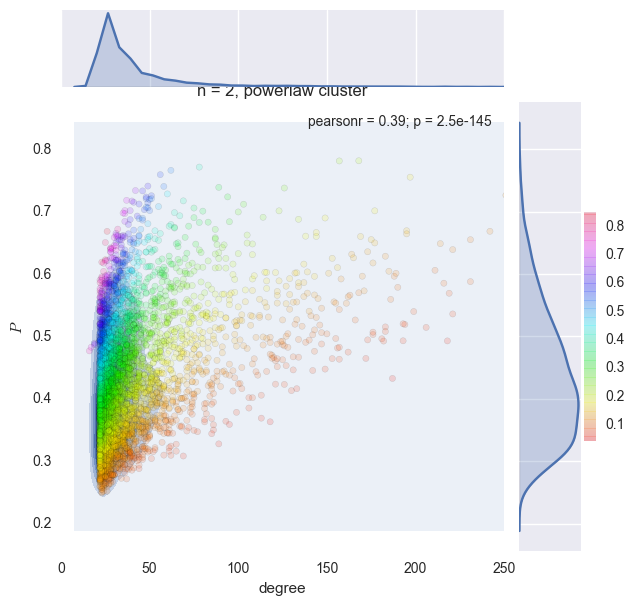

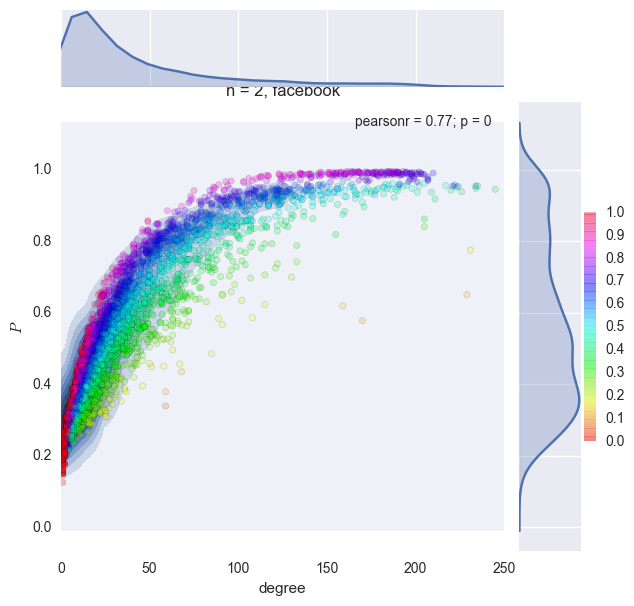

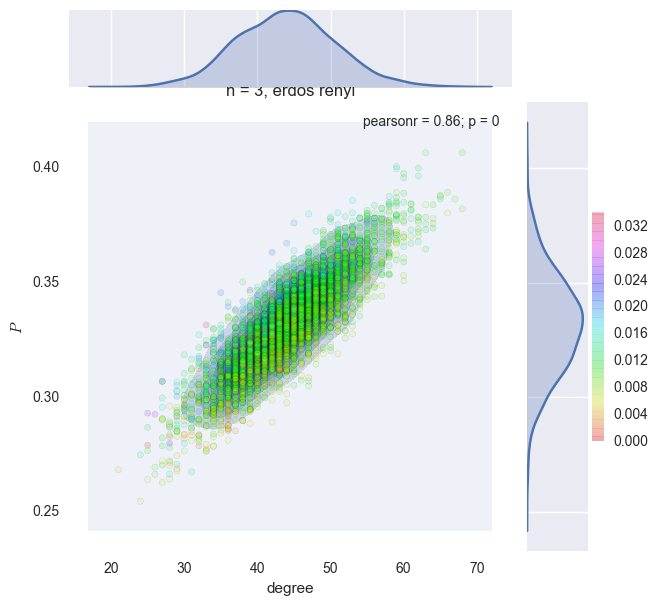

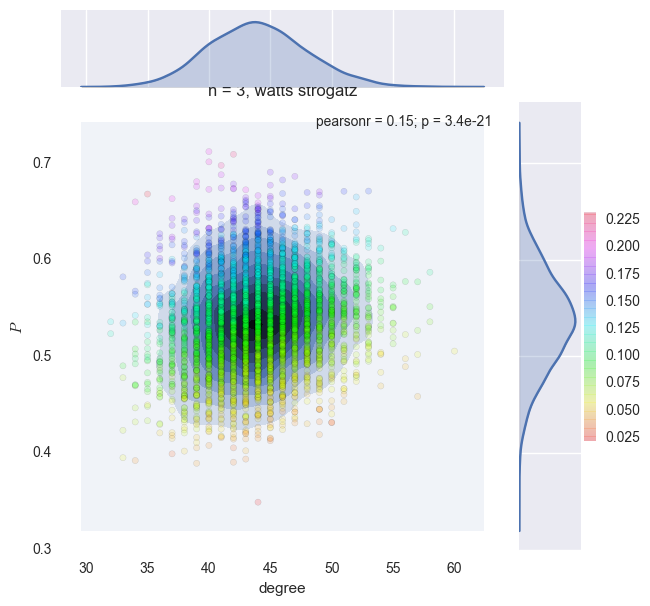

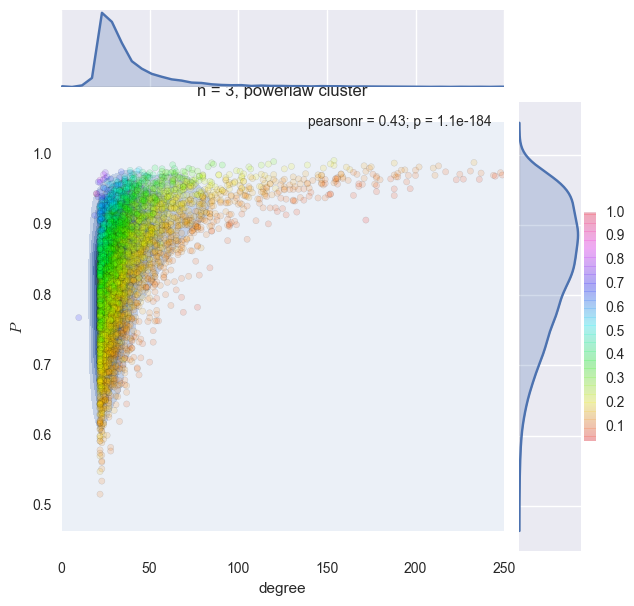

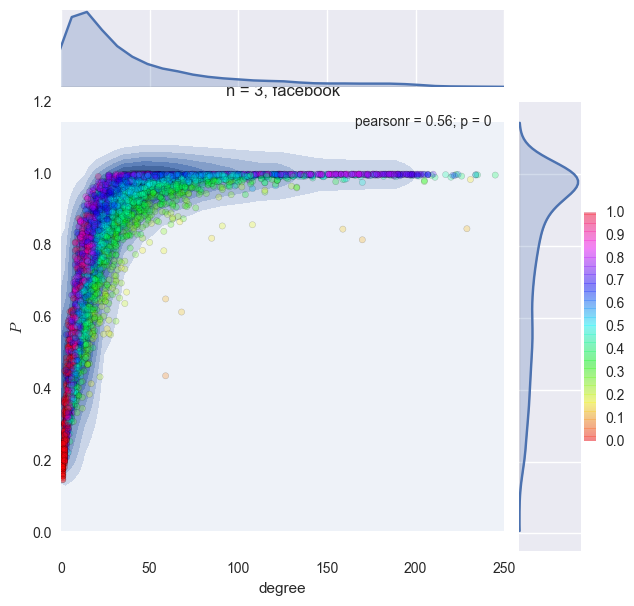

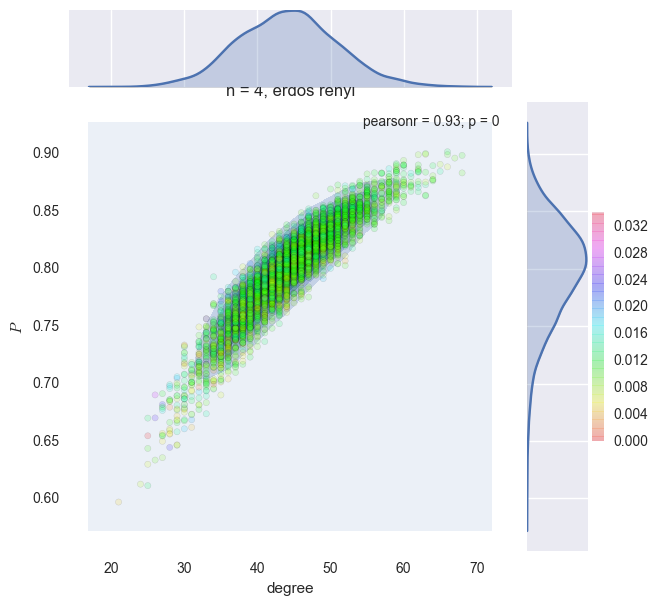

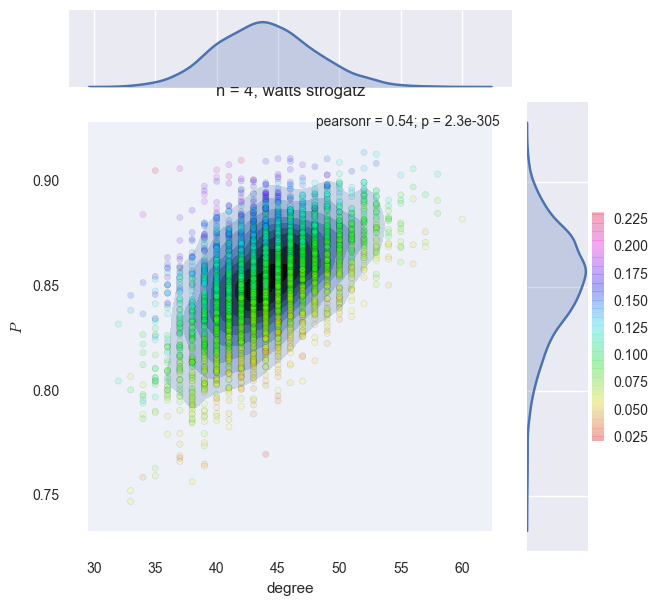

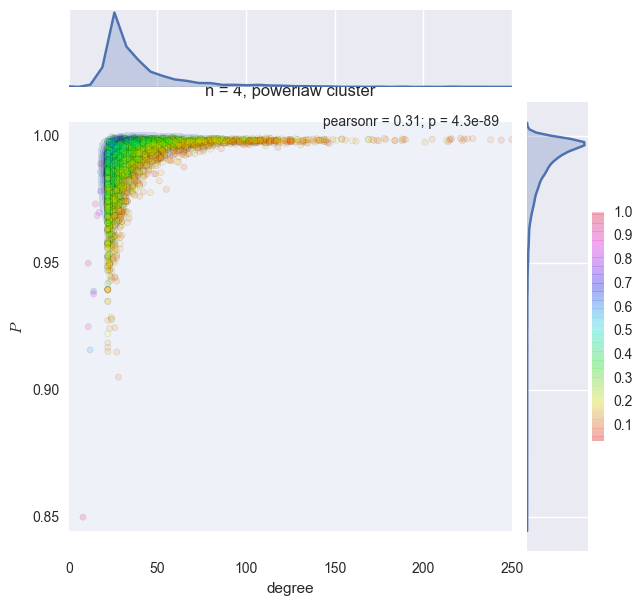

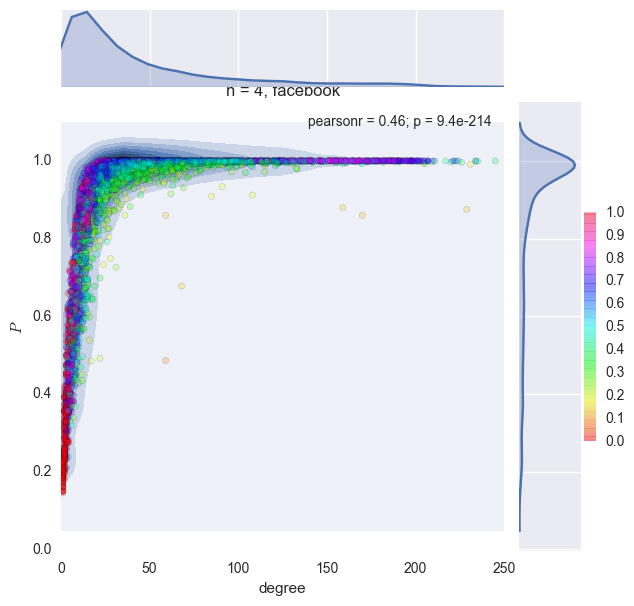

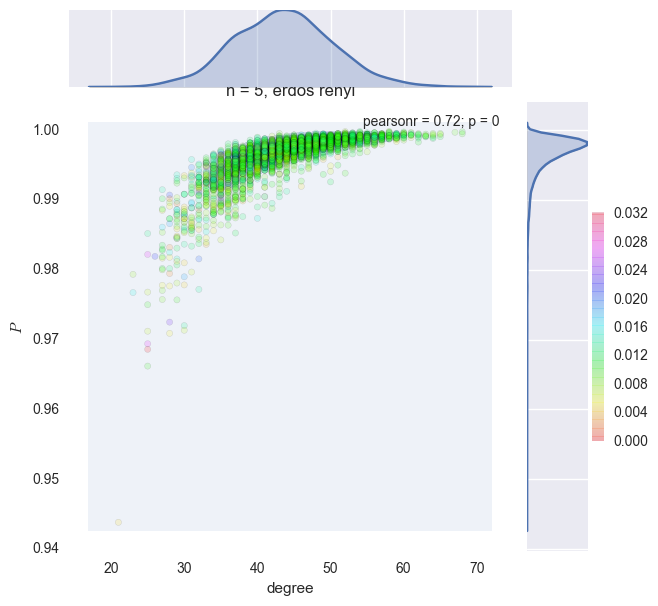

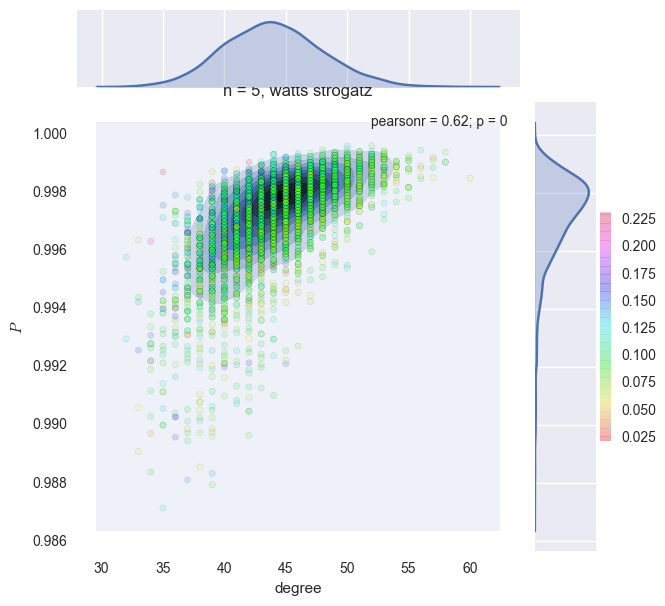

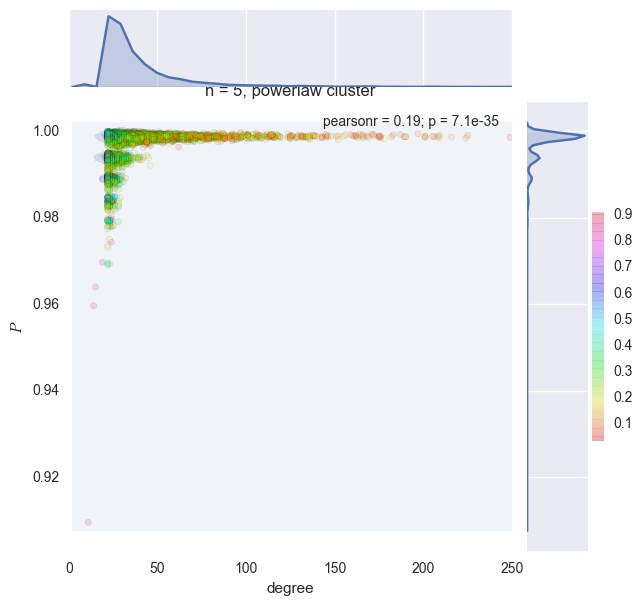

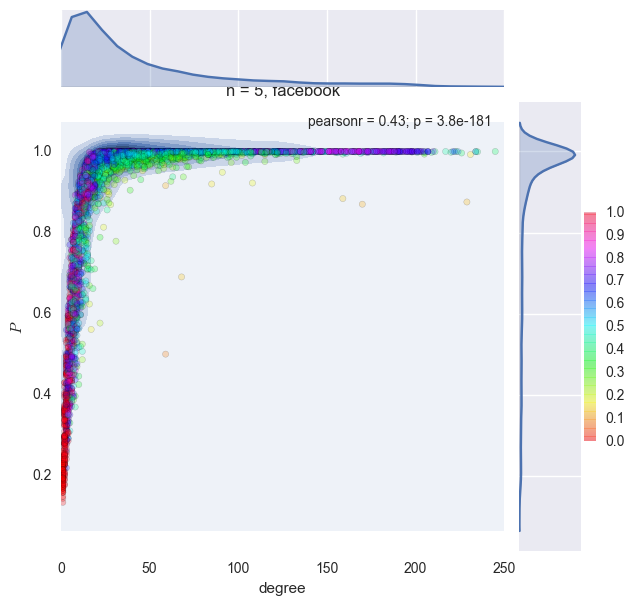

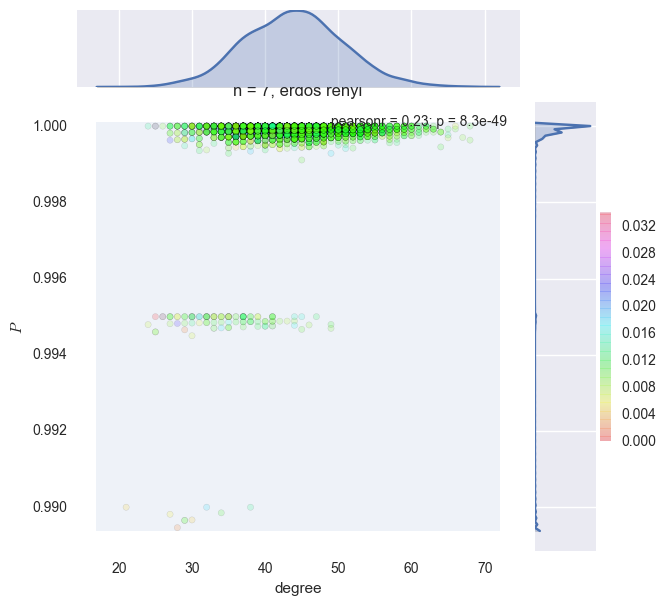

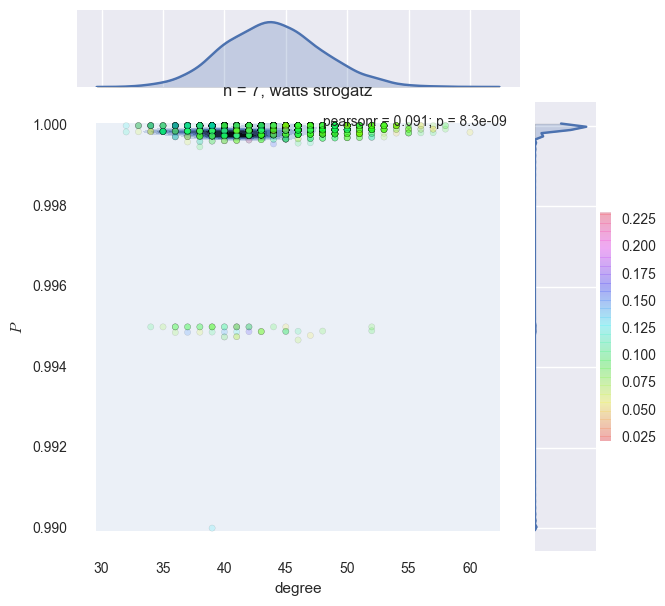

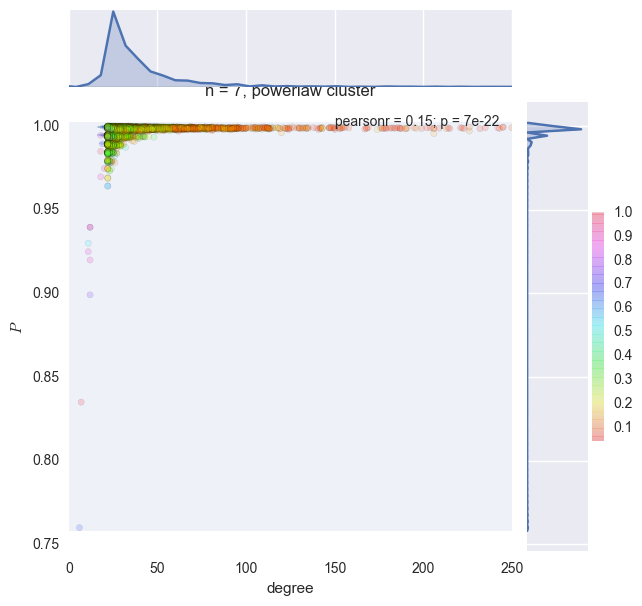

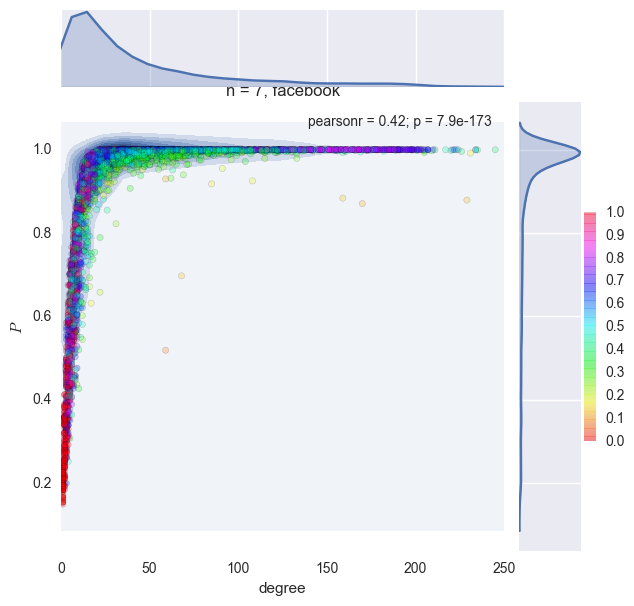

In [32]:
cs = pyimport("matplotlib.colors")


for j = 1:length(n_range)
    for i = 1:length(graph_type_range)
        alpha = i < 4 ? 0.15 : 0.25
        gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
        gg[:ax_joint][:hold](1)
        ps = gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_thresholds[j,i],cmap=ColorMap("hsv"),c = hist_all_clustering[j,i],alpha=alpha)
        gg[:ax_joint][:patch][:set_visible](false)
        colorbar(ps)
        if i > 2
            gg[:ax_joint][:set_xlim]((0,250))
        end
        gg[:ax_joint][:set_xlabel]("degree")
        gg[:ax_joint][:set_ylabel](L"P")
        gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
        #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
        #savefig("../figures/degree_p_known_correlation_order_$(n_range[j])_$(graph_name_range[i]).png",bbox_inches="tight")
    end
end

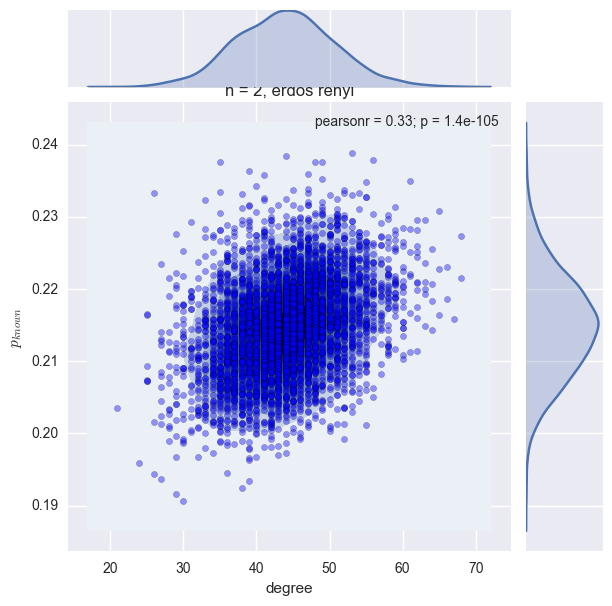

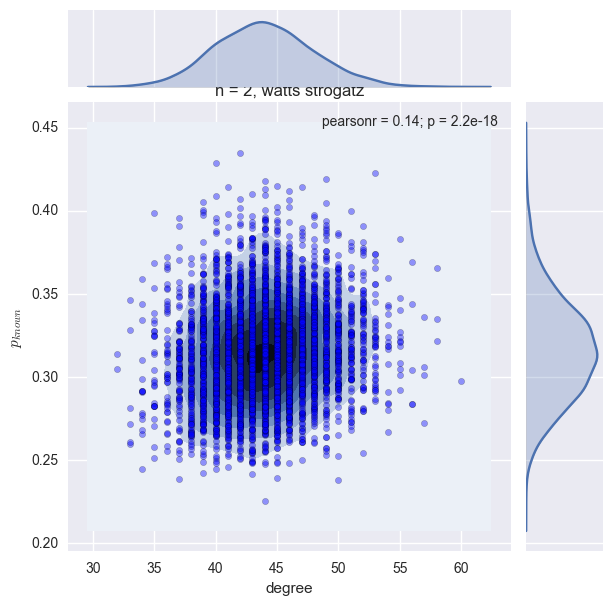

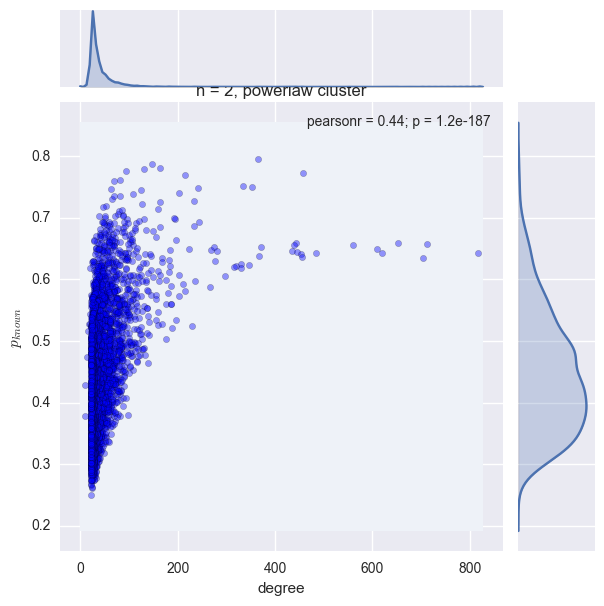

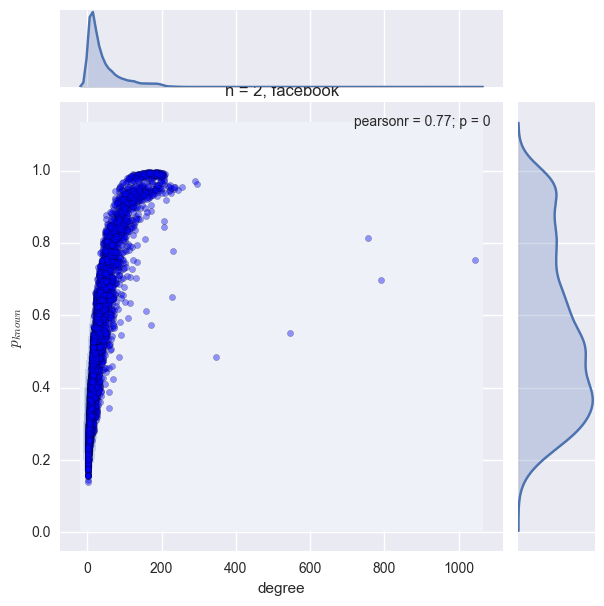

In [39]:
j = 1
for i = 1:length(graph_type_range)

    gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
    gg[:ax_joint][:hold](1)
    gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_thresholds[j,i],alpha=0.4)
    gg[:ax_joint][:set_xlabel]("degree")
    gg[:ax_joint][:set_ylabel](L"p_{known}")
    gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
    #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
end

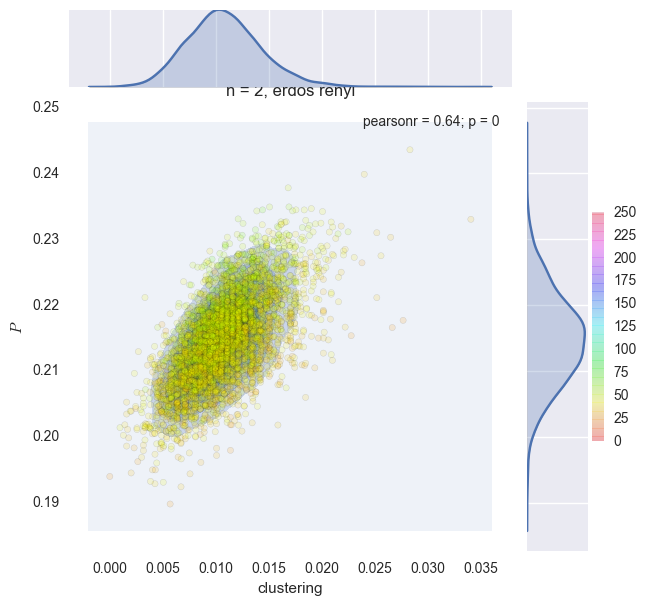

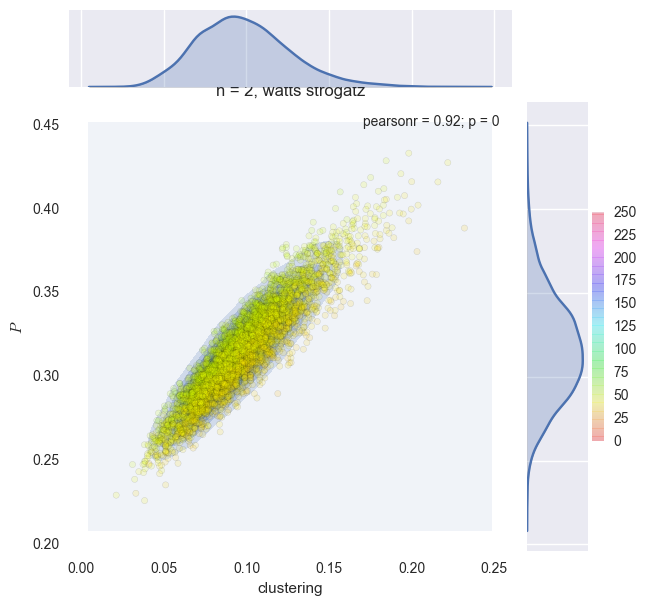

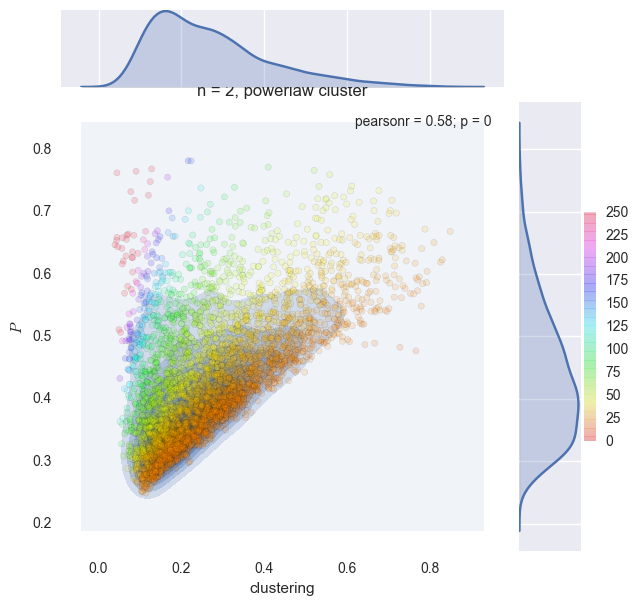

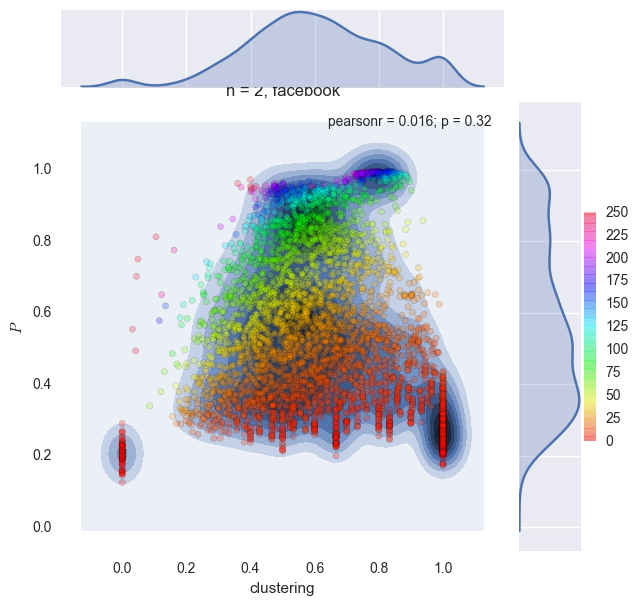

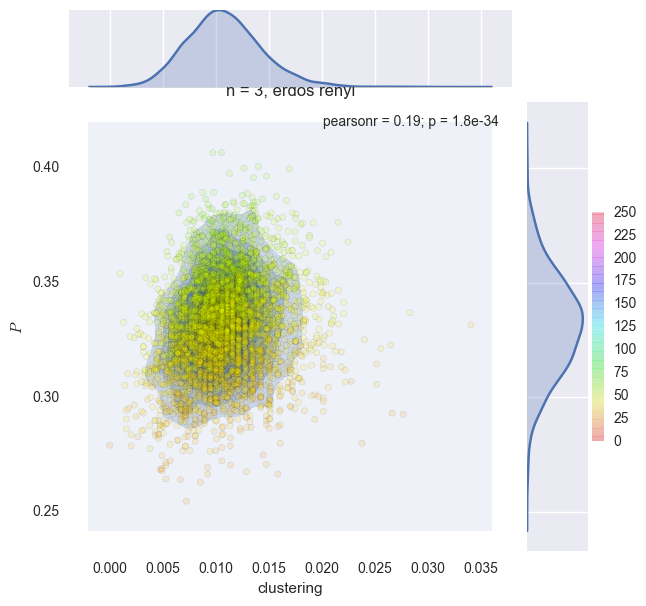

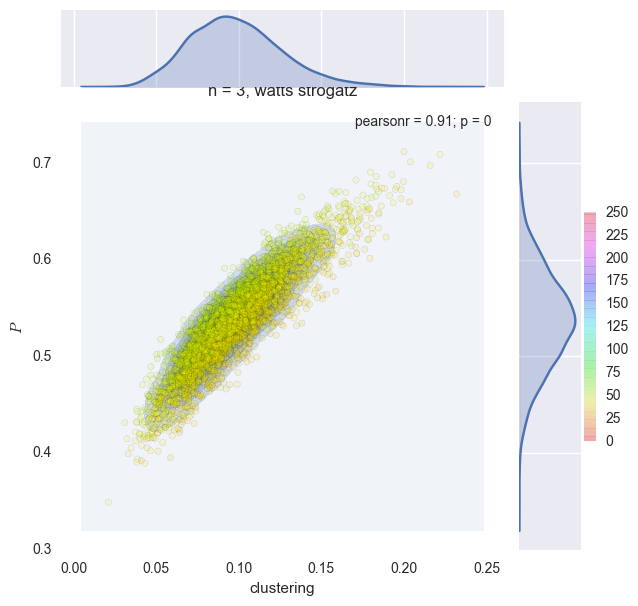

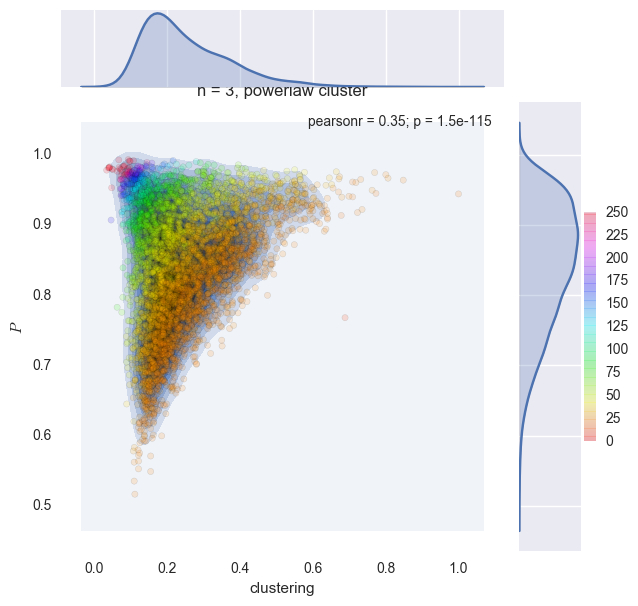

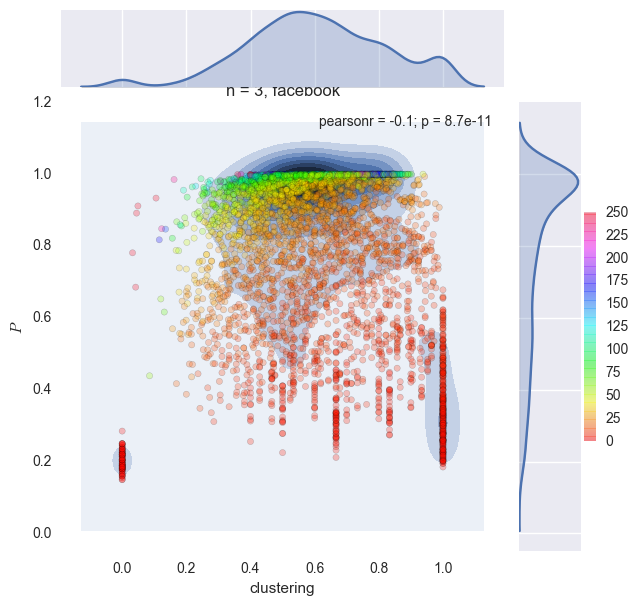

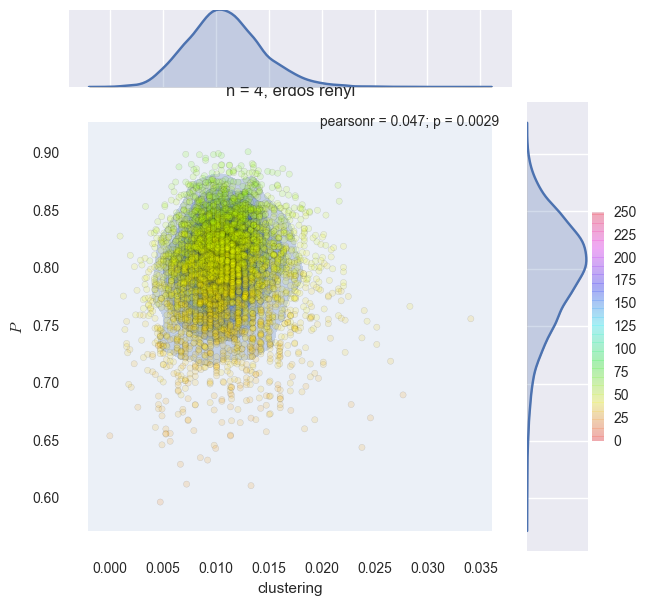

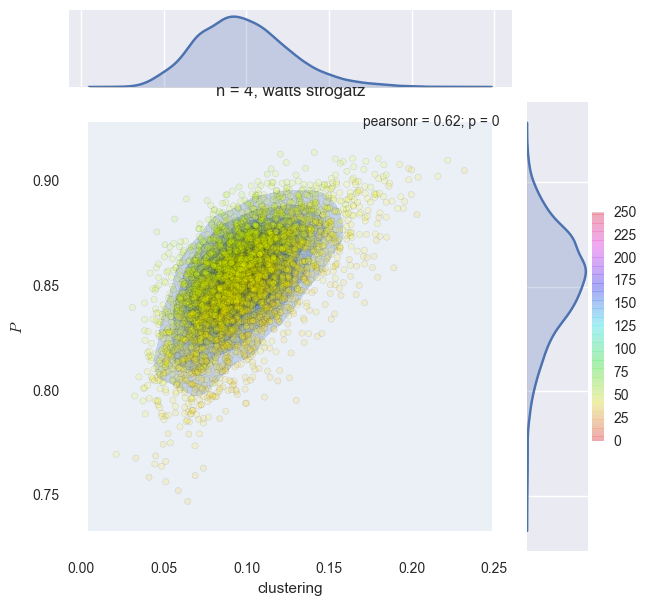

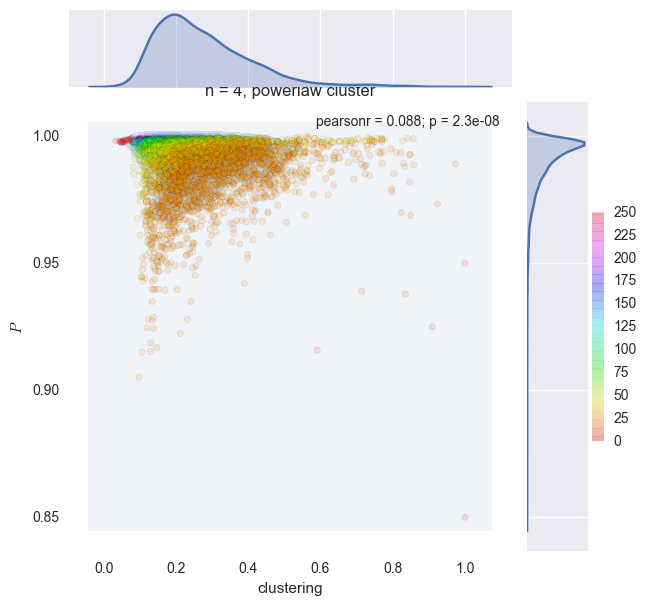

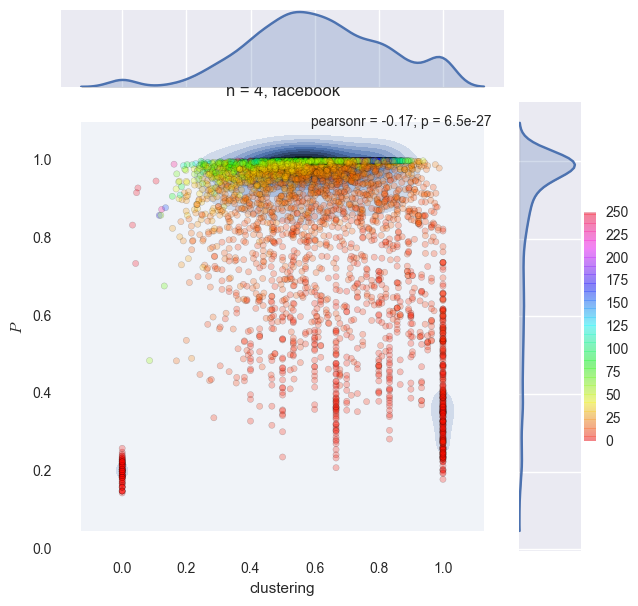

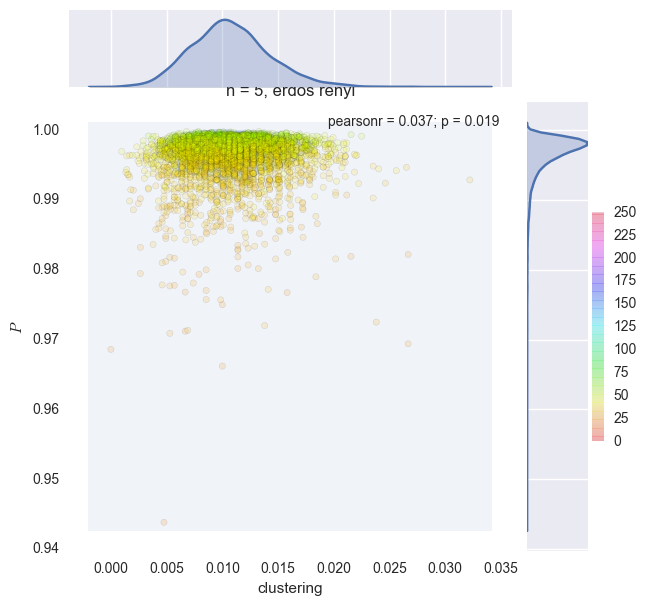

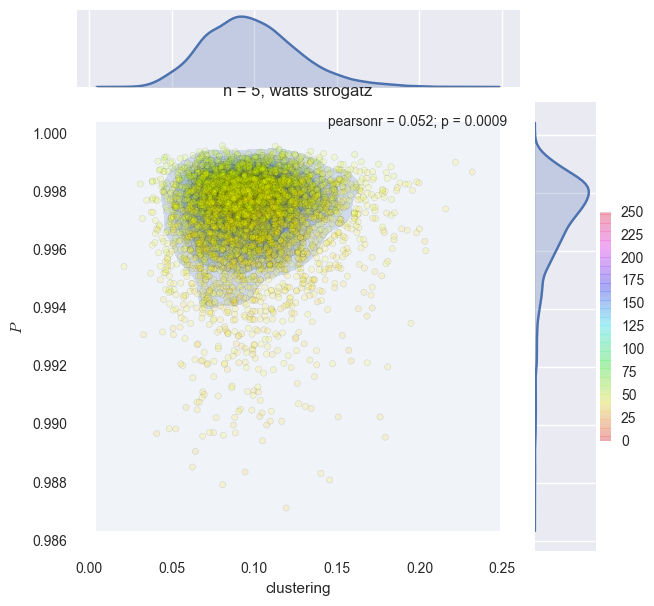

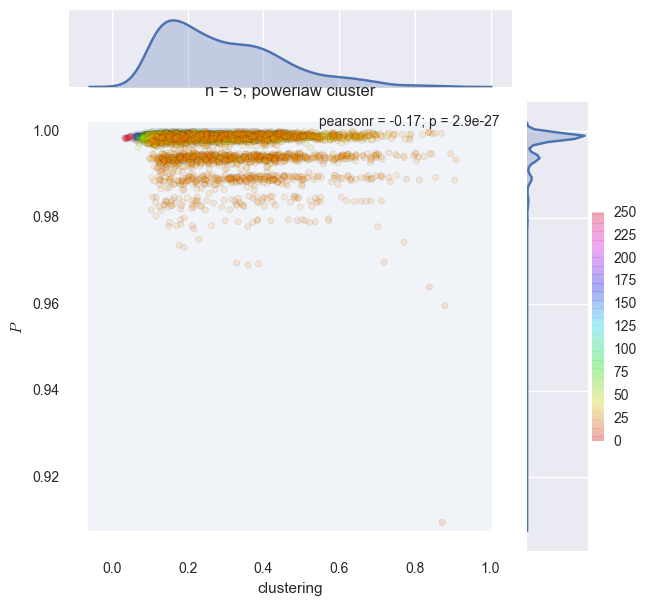

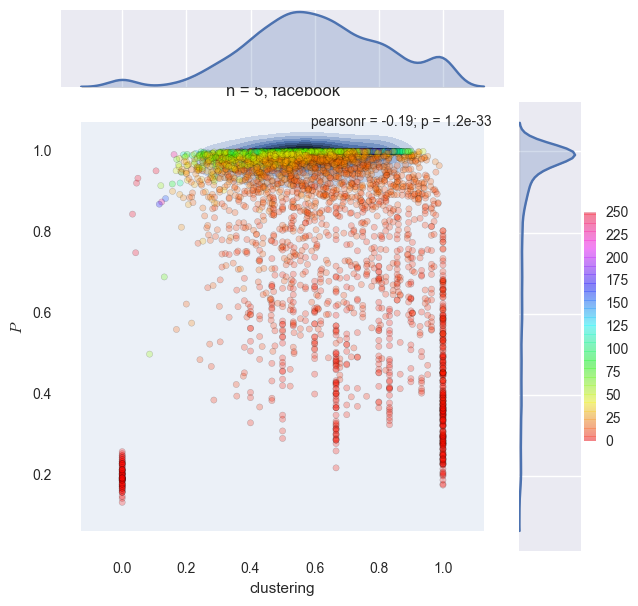

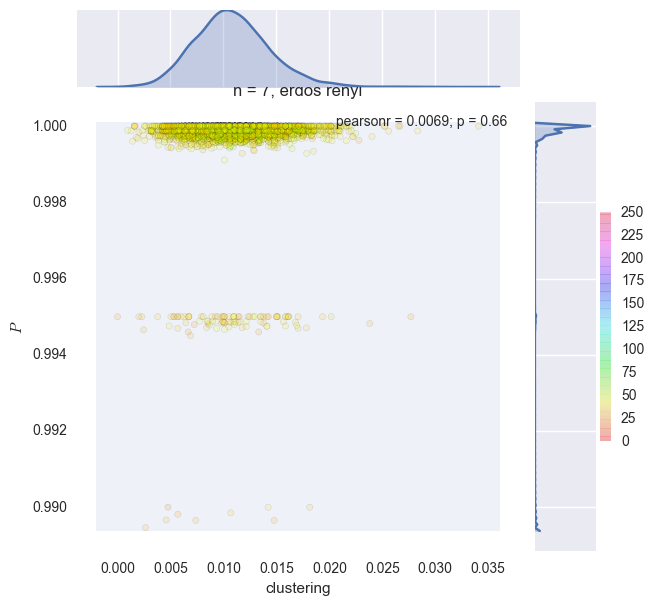

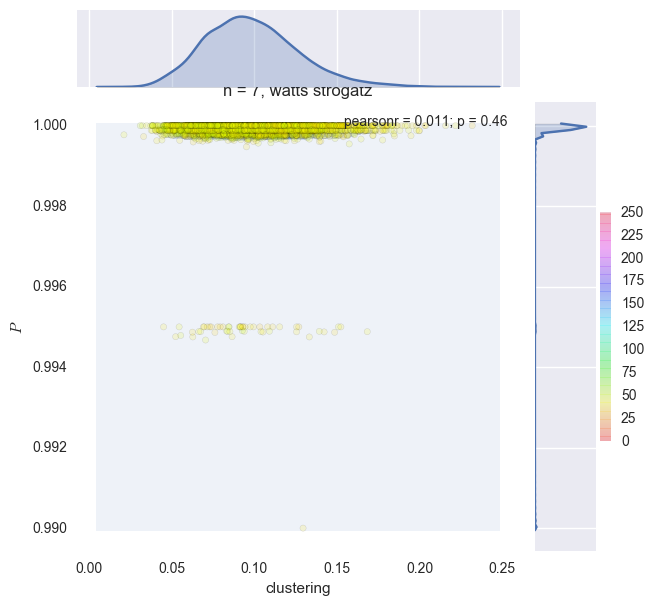

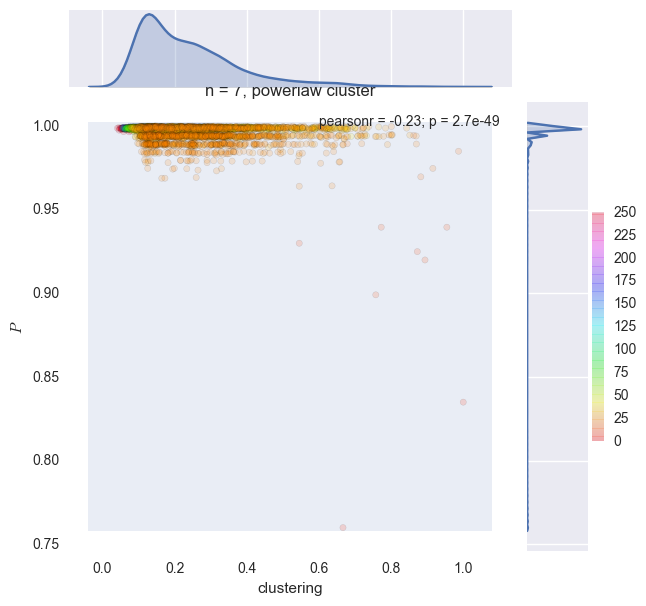

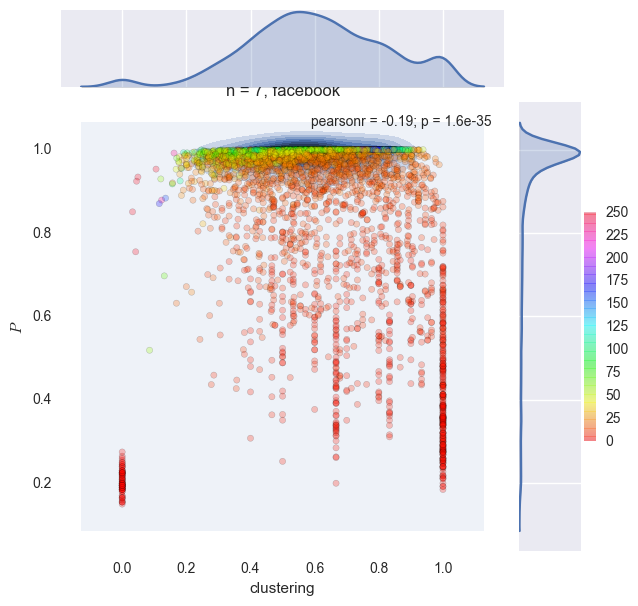

In [33]:
cs = pyimport("matplotlib.colors")


for j = 1:length(n_range)
    for i = 1:length(graph_type_range)
        alpha = i < 4 ? 0.15 : 0.25
        gg = sns.jointplot(convert(Array{Float64,1},hist_all_clustering[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
        gg[:ax_joint][:hold](1)
        ps = gg[:ax_joint][:scatter](hist_all_clustering[j,i],hist_all_thresholds[j,i],cmap=ColorMap("hsv"),c = hist_all_degrees[j,i],vmin=0,vmax=250,alpha=alpha)
        gg[:ax_joint][:patch][:set_visible](false)
        colorbar(ps)
        gg[:ax_joint][:set_xlabel]("clustering")
        gg[:ax_joint][:set_ylabel](L"P")
        gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
        #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
        #savefig("../figures/clustering_p_known_correlation_order_$(n_range[j])_$(graph_name_range[i]).png",bbox_inches="tight")
    end
end

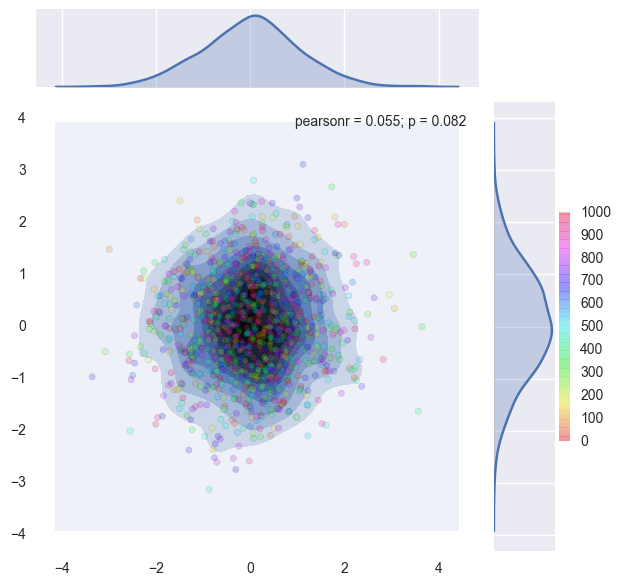

PyObject <matplotlib.colorbar.Colorbar object at 0x32c9512d0>

In [14]:
tx = randn(1000)
ty = randn(1000)
gg = sns.jointplot(tx,ty,kind="kdeplot")
ps = gg[:ax_joint][:scatter](tx,ty,cmap=ColorMap("hsv"),c = collect(1:1000),vmin=0,vmax=1000,alpha=0.2)
gg[:ax_joint][:patch][:set_visible](false)
#gg[:ax_joint][:set_axis_bgcolor]((0,0,0))
colorbar(ps)

In [16]:
cs = pyimport("matplotlib.colors")
pycall(cs["Normalize"],PyAny,0,1)

PyObject <matplotlib.colors.Normalize object at 0x3299f39d0>

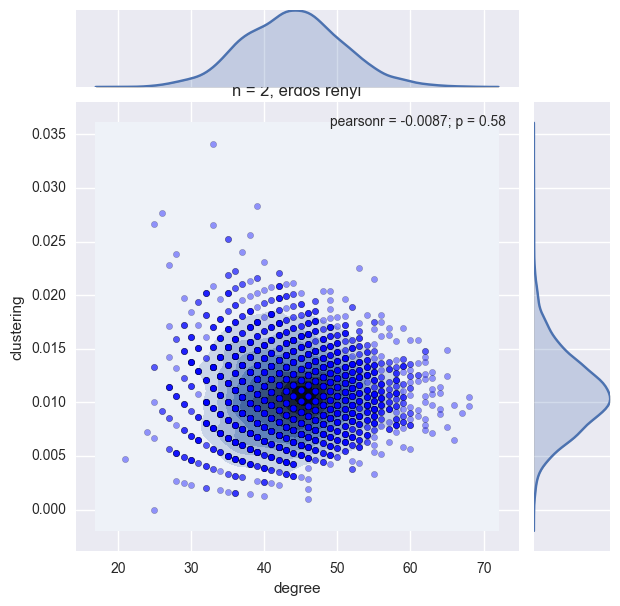

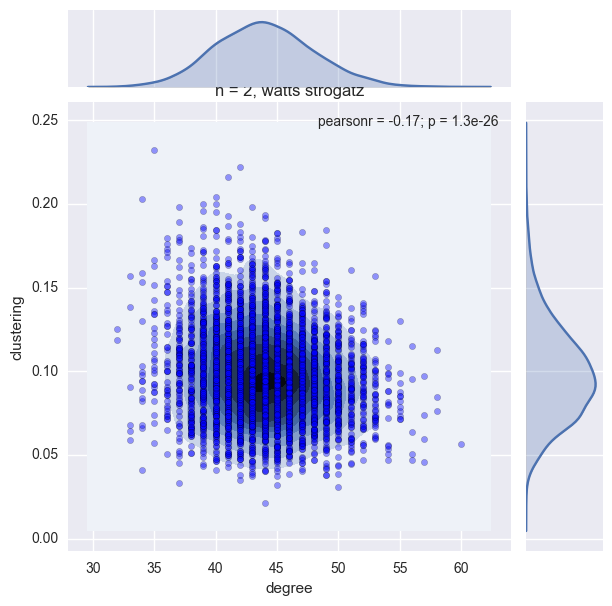

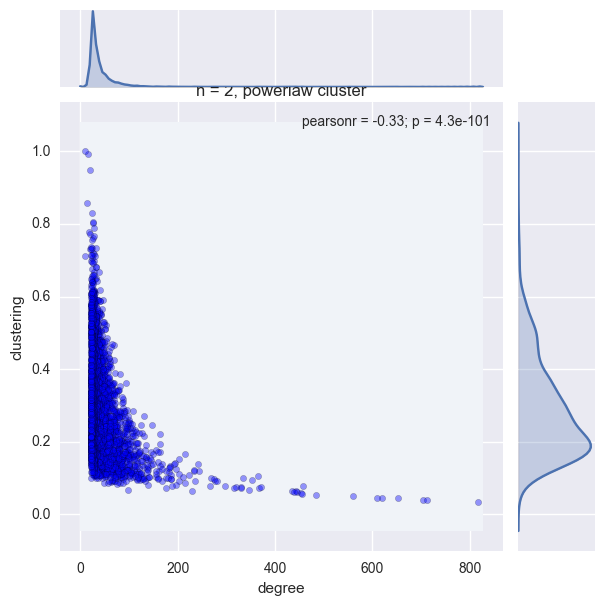

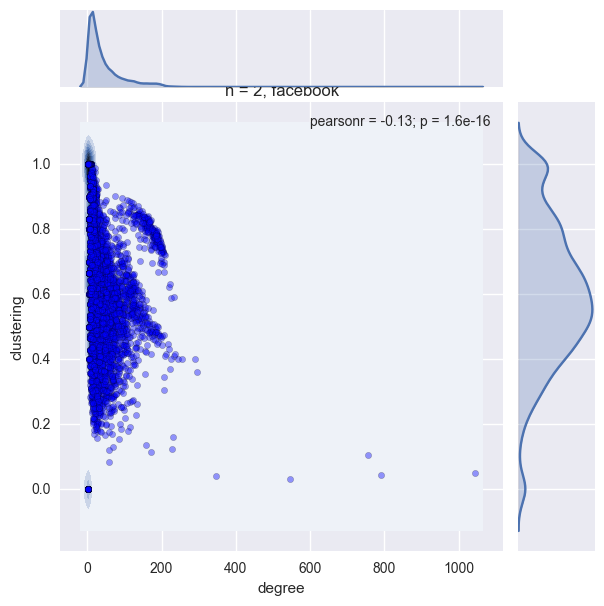

In [5]:
cs = pyimport("matplotlib.colors")
j = 1
for i = 1:length(graph_type_range)

    gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_clustering[j,i]),kind="kdeplot")
    gg[:ax_joint][:hold](1)
    gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_clustering[j,i],alpha=0.4)
    gg[:ax_joint][:set_xlabel]("degree")
    gg[:ax_joint][:set_ylabel]("clustering")
    gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
    #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
end

In [ ]:
@time p_knowns = get_p_known_percolation(g,0.4,2,1)[1]

In [ ]:
gg = sns.jointplot(convert(Array{Float64,1},hist_all_clustering[2,2]),convert(Array{Float64,1},hist_all_thresholds[2,2]),kind="kdeplot")
gg[:ax_joint][:hold](1)
gg[:ax_joint][:scatter](hist_all_clustering[2,2],hist_all_thresholds[2,2])
gg[:ax_joint][:set_xlabel]("degree")
gg[:ax_joint][:set_ylabel](L"p_{known}")
savefig("../figures/clustering_p_known_correlation")

In [ ]:

sns.jointplot(randn(10000),randn(10000))

In [ ]:
#set_backend("TkAgg")
#show()
plt[:plot]([1,2,3],[1,2,3])
plt[:show]()

# Speed Test

In [ ]:



N = 500
p_edge = 0.1
#g = LightGraphs.erdos_renyi(N,p_edge)
g = powerlaw_cluster_graph(N,Int(round((N-1)*p_edge)),0.5)
#g = LightGraphs.random_regular_graph(N,Int(round((N-1)*p_edge)))
#g = LightGraphs.watts_strogatz(N,Int(round((N-1)*p_edge)),0.1)
p = 0.2
@show get_mean_p_known_on_edge_for_graph(g,(x,y) -> get_p_known_first_order(x,y,p))
@show get_mean_p_known_on_node_for_graph(g, (x,y) -> get_p_known_first_order(x,y,p))

In [ ]:
function ave(p_known_fn)
    N = 1000
    p_edge = 0.1
    g = LightGraphs.erdos_renyi(N,p_edge)
    p_known = 0
    for v in LightGraphs.vertices(g)
        p_known += get_mean_p_known_for_node(g,v, (x,y) -> p_known_fn(x,y,p))
    end
    p_known /= length(LightGraphs.vertices(g))
end

In [ ]:
#Profile.clear()
@time ave(get_p_known_first_order)
@time ave(get_p_known_zeroth_order)


In [ ]:
Profile.print()

In [ ]:

@less mapreduce_sc_impl(1)

In [ ]:
N = 400
a = Array(1:N)
b = Array(1+N:2*N)
#intersection_length(a,b) == length(intersect(a,b))
#@time length(intersect(a,a))
@time intersection_length(a,b)
@time intersection_length_it(a,b)

## TODO

### What if we make our plots as a function of $p$ and not of $k$? We just fix $k$ to be equal to our social graph, i.e. $k = 44$.

### fit real graphs to a distribution (poisson? Pareto?) and generate artifical graphs that match that distribution and average clustering. Compare results for $P$. Do we need average clustering or distribution of clustering?

### make figure of different order $P$, one figure for each graph type.

### Perform the analysis for the real world graph as the final figure of the paper.

### what about not only per node $P$, but even per edge $P$?, i.e. nodes can change their strategy depending on opponent -> probably not because they don't know globabl graph structure.

## Key Points

- The percolation theory calculation matches the monte carlo calculation
- for short-lived gossip (low transmission length, small p), the structure matters, otherwise it doesn't much
- social graphs (clustering, small world) increase $p_known$ and thus cooperation
- Nodes with high local clustering people with tight-knit groups have high incentive to cooperate
- Nodes with high connectivity (people with many friends) have high incentive to cooperate
- modern social networks are excellent diffusors of reputation. Diffusion in a certain sense: not from here to far, but from a central node to his neighbors, via other neighbors. This is important because only neighbors on the graph actually need that reputation information. This enhances cooperation.
- if we get to very high order gossip (n > 7), then random networks become better: the number of possible paths keeps increasing because we are now essentially dealing with a "community size" of the entire graph. In social graphs, the community size is limited and doesn't scale. Once we efficiently diffuse across the communities, we don't get further benefit by even higher order gossip. The multiplicity of paths doesn't significantly increase above $n \sim 5$ or so. We can show this by comparing the $P$ curves to the percolation theory calculations. 
## TODO 
Show this with the new gamma distribution facebook graph
- future work can take strength of ties into account